## Imports

In [7]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Programs

In [8]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)
    
def rrate (r):
    rate = (r[1]/(r[1] + r[0])) * 100
    print('30 Day Readmission Rate (pct):', rate)

## Data Prep

In [9]:
df = pd.read_csv('gi_all_psm_open.csv')

In [10]:
df.shape

(39298, 37)

In [11]:
df.head()

personid                           encounterid  \
0  012e7384-a301-4dcc-9b65-55b973fd323f  745b5292-7fbd-45a5-a220-5678b9665f5e   
1  017f15fa-bc84-488f-ab4c-8648f1f06e94  29013b3b-a508-4d8e-b5ed-b0c02408ede9   
2  03393ec8-6d41-4e7c-a103-ccbd1a9d1e19  aed18cec-c00c-4a6d-8706-c1c21c970100   
3  04d1d98a-5a87-44fc-9372-308bc4ebc964  8ca906ac-0956-408f-a725-5c35a307c09e   
4  051c8032-abe2-4d7c-ad7e-06421b300b48  7e1dfe1e-d039-4e4e-9040-acb6218e90a0   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            1              1             1        1    1   7.501667   
1            0              0             0        0    0  16.273611   
2            0              0             0        0    0  23.962500   
3            0              0             0        0    0   7.340278   
4            0              0             0        0    0  10.945139   

   90_day_mortality  90_day_readmission  hospital_free_days   age  sex   race  \
0                 0                 0.0                  74  51.0    M  White   
1                 0                 1.0                  64  74.0    M  White   
2                 0                 1.0                  50   1.0    M  White   
3                 0                 0.0                  83  83.0    M  Black   
4                 0                 0.0                  79   NaN  NaN    NaN   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    0                  1                   1        1            NaN   
1    5                  0                   0        1            NaN   
2    0                  1                   0        1            NaN   
3    4                  0                   0        1            NaN   
4    0                  0                   0        0            3.7   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                      Unknown             NaN        NaN   
1                      Unknown             NaN        NaN   
2                      Unknown             NaN        NaN   
3                      Unknown             NaN        NaN   
4                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown       1.66                     High            0   
1                  Unknown        NaN                  Unknown            0   
2                  Unknown        NaN                  Unknown            0   
3                  Unknown        NaN                  Unknown            0   
4                  Unknown       0.80                   Normal            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            1     8                0          0   47.010980   
1           1.0            0     1                1          0         NaN   
2           1.0            0     6                0          0  219.920238   
3           0.0            1     6                0          0         NaN   
4           1.0            0     5                0          0  119.872691   

  eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0      Kidney Disease    0      13.5                  >= 9.0        1  
1                 NaN    0       NaN                 Unknown        1  
2              Normal    0      12.9                  >= 9.0        1  
3                 NaN    1       9.0                  >= 9.0        1  
4              Normal    0      14.4                  >= 9.0        1

In [12]:
df = df[df['non_elective'] == 0]

In [13]:
df.shape

(6233, 37)

In [14]:
df.head()

personid  \
3   04d1d98a-5a87-44fc-9372-308bc4ebc964   
9   0b1ab911-b4c3-4f38-bf4e-add68aba5344   
23  17304d75-4874-4ad2-8a27-5431bbaa55b1   
30  201558a4-c047-46c0-bc96-e43d86bedcfc   
32  2217baf3-f157-46c1-acaa-81c756329d65   

                             encounterid  pre_albumin  early_albumin  \
3   8ca906ac-0956-408f-a725-5c35a307c09e            0              0   
9   33cd3c1c-16f0-42d3-bd12-8be4ec704197            0              0   
23  3fde9161-e6df-4ce2-bc54-ec9896b43988            1              0   
30  429f0cb3-72d0-4a5b-b8f9-a019539a2703            0              1   
32  2df88620-5d35-43ed-bf62-032f88b89e06            0              0   

    late_albumin  albumin  ICU   LOS_days  90_day_mortality  \
3              0        0    0   7.340278                 0   
9              0        0    0  12.275000                 0   
23             0        1    1  24.204167                 0   
30             0        1    0   2.336111                 0   
32             0        0    0   7.321528                 0   

    90_day_readmission  hospital_free_days   age sex   race  CCI  \
3                  0.0                  83  83.0   M  Black    4   
9                  0.0                  76  54.0   F  White    0   
23                 1.0                  61  58.0   M  White    3   
30                 1.0                  56  81.0   M  White    2   
32                 1.0                  82  64.0   F  White    0   

    preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
3                   0                   0        1            NaN   
9                   0                   0        0            NaN   
23                  1                   0        0            2.8   
30                  0                   0        0            NaN   
32                  0                   0        0            NaN   

   preop_albumin_classification  postop_albumin  preop_inr  \
3                       Unknown             NaN        NaN   
9                       Unknown             3.7        NaN   
23                          Low             NaN        NaN   
30                      Unknown             NaN        NaN   
32                      Unknown             NaN        NaN   

   preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
3                   Unknown        NaN                  Unknown            0   
9                   Unknown        NaN                  Unknown            0   
23                  Unknown        0.8                   Normal            0   
30                  Unknown        0.8                   Normal            0   
32                  Unknown        NaN                  Unknown            0   

    non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
3            0.0            1     6                0          0         NaN   
9            0.0            0     0                0          0  103.336037   
23           0.0            0     1                0          1   98.468928   
30           0.0            0     1                1          0   83.778374   
32           0.0            1     0                0          0   81.597159   

     eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
3                    NaN    1       9.0                  >= 9.0        1  
9                 Normal    0       NaN                 Unknown        1  
23                Normal    0      12.6                  >= 9.0        1  
30  Early Kidney Disease    0      12.4                  >= 9.0        1  
32  Early Kidney Disease    1       NaN                 Unknown        1

In [15]:
df.columns

Index(['personid', 'encounterid', 'pre_albumin', 'early_albumin',
       'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality',
       '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI',
       'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin',
       'preop_albumin_classification', 'postop_albumin', 'preop_inr',
       'preop_inr_classification', 'preop_scr', 'preop_scr_classification',
       'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension',
       'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb',
       'preop_hb_classification', 'open_pr'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6233 entries, 3 to 39296
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   personid                      6233 non-null   object 
 1   encounterid                   6233 non-null   object 
 2   pre_albumin                   6233 non-null   int64  
 3   early_albumin                 6233 non-null   int64  
 4   late_albumin                  6233 non-null   int64  
 5   albumin                       6233 non-null   int64  
 6   ICU                           6233 non-null   int64  
 7   LOS_days                      6233 non-null   float64
 8   90_day_mortality              6233 non-null   int64  
 9   90_day_readmission            5947 non-null   float64
 10  hospital_free_days            6233 non-null   int64  
 11  age                           6151 non-null   float64
 12  sex                           6142 non-null   object 
 13  ra

In [17]:
df.isnull().sum()

personid                           0
encounterid                        0
pre_albumin                        0
early_albumin                      0
late_albumin                       0
albumin                            0
ICU                                0
LOS_days                           0
90_day_mortality                   0
90_day_readmission               286
hospital_free_days                 0
age                               82
sex                               91
race                             311
CCI                                0
preop_hypotension                  0
postop_hypotension                 0
MAKE_90                            0
preop_albumin                   5265
preop_albumin_classification       0
postop_albumin                  5263
preop_inr                       6187
preop_inr_classification           0
preop_scr                       3974
preop_scr_classification           0
transfusion                        0
non_elective                       0
v

In [18]:
df.early_albumin.value_counts()

0    5930
1     303
Name: early_albumin, dtype: int64

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [19]:
df[df['early_albumin'] == 1].LOS_days.describe()

count    303.000000
mean      15.649951
std       21.564862
min        1.016667
25%        6.307292
50%        9.185417
75%       16.237332
max      243.920833
Name: LOS_days, dtype: float64

In [20]:
df[df['early_albumin'] == 0].LOS_days.describe()

count    5930.000000
mean       12.022775
std        15.487904
min         0.000000
25%         4.934201
50%         7.342766
75%        13.630208
max       252.101551
Name: LOS_days, dtype: float64

In [21]:
df[df['albumin'] == 1].CCI.describe()

count    1491.000000
mean        3.295775
std         2.802272
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        13.000000
Name: CCI, dtype: float64

In [22]:
df[df['albumin'] == 0].CCI.describe()

count    4742.000000
mean        2.201603
std         2.422443
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: CCI, dtype: float64

In [23]:
om = df[df['early_albumin'] == 1]['90_day_mortality'].value_counts()
print(om)
mrate(om)

0    275
1     28
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 9.24092409240924


In [24]:
om1 = df[df['early_albumin'] == 0]['90_day_mortality'].value_counts()
print(om1)
mrate(om1)

0    5672
1     258
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 4.350758853288364


In [25]:
ir = df[df['early_albumin'] == 1]['90_day_readmission'].value_counts()
print(ir)
mrate(ir)

0.0    151
1.0    124
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 45.09090909090909


In [26]:
ir1 = df[df['early_albumin'] == 0]['90_day_readmission'].value_counts()
print(ir1)
mrate(ir1)

0.0    3905
1.0    1767
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 31.153032440056418


In [27]:
df.head()

personid  \
3   04d1d98a-5a87-44fc-9372-308bc4ebc964   
9   0b1ab911-b4c3-4f38-bf4e-add68aba5344   
23  17304d75-4874-4ad2-8a27-5431bbaa55b1   
30  201558a4-c047-46c0-bc96-e43d86bedcfc   
32  2217baf3-f157-46c1-acaa-81c756329d65   

                             encounterid  pre_albumin  early_albumin  \
3   8ca906ac-0956-408f-a725-5c35a307c09e            0              0   
9   33cd3c1c-16f0-42d3-bd12-8be4ec704197            0              0   
23  3fde9161-e6df-4ce2-bc54-ec9896b43988            1              0   
30  429f0cb3-72d0-4a5b-b8f9-a019539a2703            0              1   
32  2df88620-5d35-43ed-bf62-032f88b89e06            0              0   

    late_albumin  albumin  ICU   LOS_days  90_day_mortality  \
3              0        0    0   7.340278                 0   
9              0        0    0  12.275000                 0   
23             0        1    1  24.204167                 0   
30             0        1    0   2.336111                 0   
32             0        0    0   7.321528                 0   

    90_day_readmission  hospital_free_days   age sex   race  CCI  \
3                  0.0                  83  83.0   M  Black    4   
9                  0.0                  76  54.0   F  White    0   
23                 1.0                  61  58.0   M  White    3   
30                 1.0                  56  81.0   M  White    2   
32                 1.0                  82  64.0   F  White    0   

    preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
3                   0                   0        1            NaN   
9                   0                   0        0            NaN   
23                  1                   0        0            2.8   
30                  0                   0        0            NaN   
32                  0                   0        0            NaN   

   preop_albumin_classification  postop_albumin  preop_inr  \
3                       Unknown             NaN        NaN   
9                       Unknown             3.7        NaN   
23                          Low             NaN        NaN   
30                      Unknown             NaN        NaN   
32                      Unknown             NaN        NaN   

   preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
3                   Unknown        NaN                  Unknown            0   
9                   Unknown        NaN                  Unknown            0   
23                  Unknown        0.8                   Normal            0   
30                  Unknown        0.8                   Normal            0   
32                  Unknown        NaN                  Unknown            0   

    non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
3            0.0            1     6                0          0         NaN   
9            0.0            0     0                0          0  103.336037   
23           0.0            0     1                0          1   98.468928   
30           0.0            0     1                1          0   83.778374   
32           0.0            1     0                0          0   81.597159   

     eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
3                    NaN    1       9.0                  >= 9.0        1  
9                 Normal    0       NaN                 Unknown        1  
23                Normal    0      12.6                  >= 9.0        1  
30  Early Kidney Disease    0      12.4                  >= 9.0        1  
32  Early Kidney Disease    1       NaN                 Unknown        1

In [28]:
print(df.columns.tolist())

['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [29]:
df_a24 = df[['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']]

In [30]:
df_a24.head()

personid  \
3   04d1d98a-5a87-44fc-9372-308bc4ebc964   
9   0b1ab911-b4c3-4f38-bf4e-add68aba5344   
23  17304d75-4874-4ad2-8a27-5431bbaa55b1   
30  201558a4-c047-46c0-bc96-e43d86bedcfc   
32  2217baf3-f157-46c1-acaa-81c756329d65   

                             encounterid  pre_albumin  early_albumin  \
3   8ca906ac-0956-408f-a725-5c35a307c09e            0              0   
9   33cd3c1c-16f0-42d3-bd12-8be4ec704197            0              0   
23  3fde9161-e6df-4ce2-bc54-ec9896b43988            1              0   
30  429f0cb3-72d0-4a5b-b8f9-a019539a2703            0              1   
32  2df88620-5d35-43ed-bf62-032f88b89e06            0              0   

    late_albumin  ICU   LOS_days  90_day_mortality  90_day_readmission  \
3              0    0   7.340278                 0                 0.0   
9              0    0  12.275000                 0                 0.0   
23             0    1  24.204167                 0                 1.0   
30             0    0   2.336111                 0                 1.0   
32             0    0   7.321528                 0                 1.0   

    hospital_free_days  vasopressor sex   race  postop_hypotension  MAKE_90  \
3                   83            1   M  Black                   0        1   
9                   76            0   F  White                   0        0   
23                  61            0   M  White                   0        0   
30                  56            0   M  White                   0        0   
32                  82            1   F  White                   0        0   

    preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
3             NaN                      Unknown             NaN        NaN   
9             NaN                      Unknown             3.7        NaN   
23            2.8                          Low             NaN        NaN   
30            NaN                      Unknown             NaN        NaN   
32            NaN                      Unknown             NaN        NaN   

   preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
3                   Unknown        NaN                  Unknown            0   
9                   Unknown        NaN                  Unknown            0   
23                  Unknown        0.8                   Normal            0   
30                  Unknown        0.8                   Normal            0   
32                  Unknown        NaN                  Unknown            0   

    non_elective        eGFR   eGFR_classification  LVR  preop_hb  \
3            0.0         NaN                   NaN    1       9.0   
9            0.0  103.336037                Normal    0       NaN   
23           0.0   98.468928                Normal    0      12.6   
30           0.0   83.778374  Early Kidney Disease    0      12.4   
32           0.0   81.597159  Early Kidney Disease    1       NaN   

   preop_hb_classification  open_pr  
3                   >= 9.0        1  
9                  Unknown        1  
23                  >= 9.0        1  
30                  >= 9.0        1  
32                 Unknown        1

In [31]:
# remove vasopressor variable - it is an outcome

df.drop(columns=['personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr'], inplace=True)

In [32]:
df.shape

(6233, 8)

In [33]:
df.head()

encounterid  albumin   age  CCI  \
3   8ca906ac-0956-408f-a725-5c35a307c09e        0  83.0    4   
9   33cd3c1c-16f0-42d3-bd12-8be4ec704197        0  54.0    0   
23  3fde9161-e6df-4ce2-bc54-ec9896b43988        1  58.0    3   
30  429f0cb3-72d0-4a5b-b8f9-a019539a2703        1  81.0    2   
32  2df88620-5d35-43ed-bf62-032f88b89e06        0  64.0    0   

    preop_hypotension  NEWS  bl_hypertension  preop_MAP  
3                   0     6                0          0  
9                   0     0                0          0  
23                  1     1                0          1  
30                  0     1                1          0  
32                  0     0                0          0

In [34]:
df.isnull().sum()

encounterid           0
albumin               0
age                  82
CCI                   0
preop_hypotension     0
NEWS                  0
bl_hypertension       0
preop_MAP             0
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(6151, 8)

In [37]:
df.albumin.value_counts()

0    4668
1    1483
Name: albumin, dtype: int64

In [38]:
df.head()

encounterid  albumin   age  CCI  \
3   8ca906ac-0956-408f-a725-5c35a307c09e        0  83.0    4   
9   33cd3c1c-16f0-42d3-bd12-8be4ec704197        0  54.0    0   
23  3fde9161-e6df-4ce2-bc54-ec9896b43988        1  58.0    3   
30  429f0cb3-72d0-4a5b-b8f9-a019539a2703        1  81.0    2   
32  2df88620-5d35-43ed-bf62-032f88b89e06        0  64.0    0   

    preop_hypotension  NEWS  bl_hypertension  preop_MAP  
3                   0     6                0          0  
9                   0     0                0          0  
23                  1     1                0          1  
30                  0     1                1          0  
32                  0     0                0          0

## Initialize PsmPy Class

In [39]:
# adding only non-elective == 1
# adding age variable

psm = PsmPy(df, treatment= 'albumin', indx='encounterid')

In [40]:
%%time
psm.logistic_ps(balance = True)

Wall time: 3.51 s


In [41]:
df_psm = psm.predicted_data

In [42]:
df_psm.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  3fde9161-e6df-4ce2-bc54-ec9896b43988  58.0    3                  1     1   
1  429f0cb3-72d0-4a5b-b8f9-a019539a2703  81.0    2                  0     1   
2  f62220ef-ed55-49a2-9061-93aab252246f  68.0    4                  0     3   
3  5bb5ee25-1a13-4066-bf87-d56ff472df02  49.0    0                  0     0   
4  3439835c-bde7-4923-bd07-f276b02b119e  62.0    6                  0     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                0          1          0.863590          1.845431        1  
1                1          0          0.409398         -0.366454        1  
2                1          0          0.495405         -0.018379        1  
3                0          0          0.368330         -0.539388        1  
4                0          0          0.601740          0.412720        1

## Plot the propensity score / propensity logits

In [43]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 1min 45s


C:\ProgramData\Anaconda3\lib\site-packages\psmpy\psmpy.py:347: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


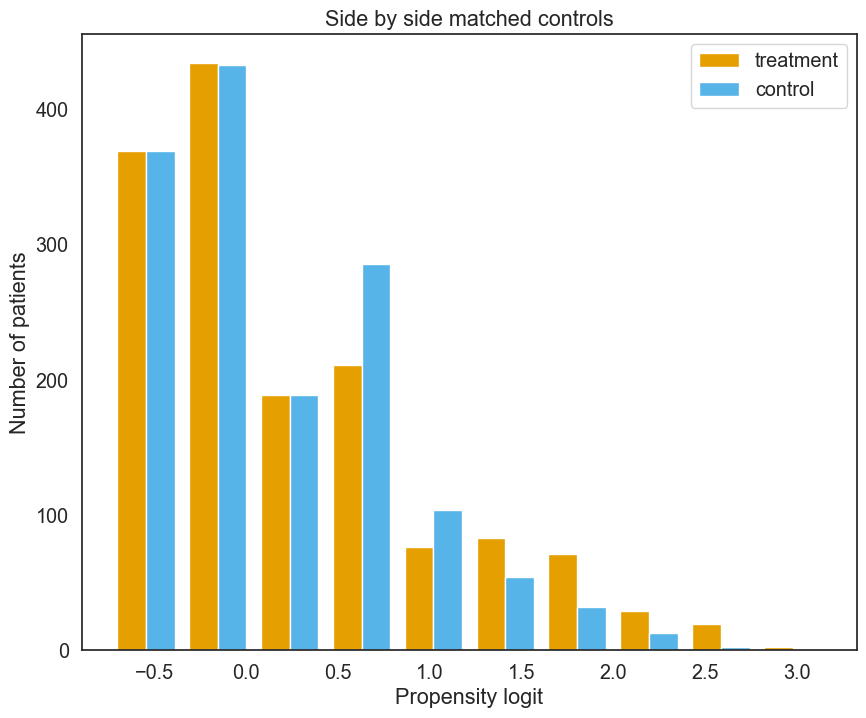

In [44]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

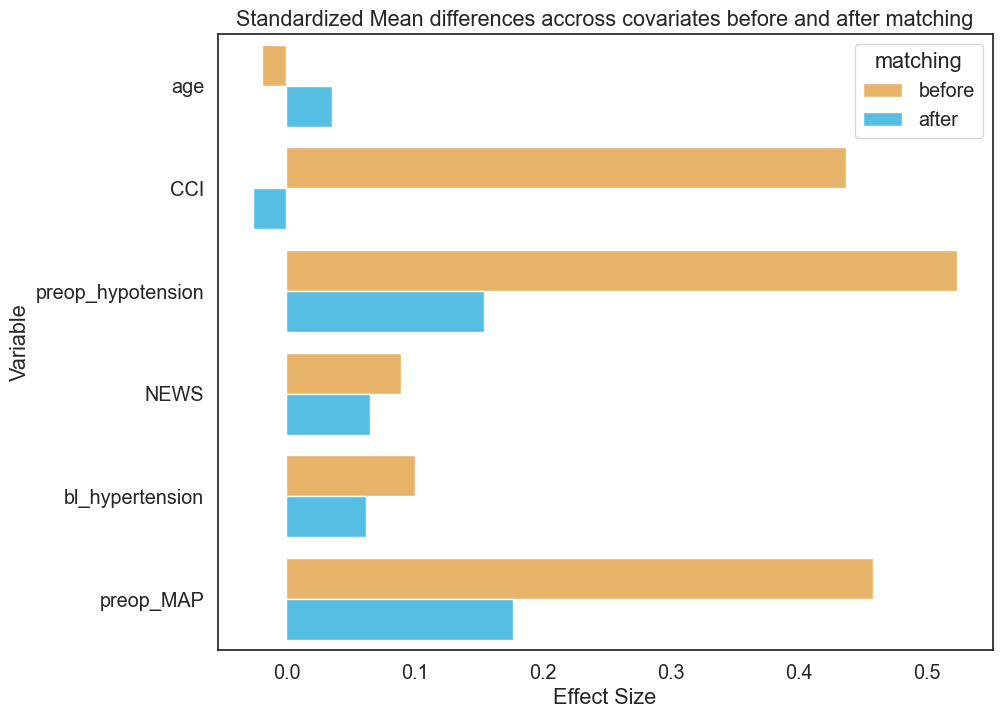

In [45]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [46]:
matched_df = psm.df_matched

In [47]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  3fde9161-e6df-4ce2-bc54-ec9896b43988  58.0    3                  1     1   
1  429f0cb3-72d0-4a5b-b8f9-a019539a2703  81.0    2                  0     1   
2  f62220ef-ed55-49a2-9061-93aab252246f  68.0    4                  0     3   
3  5bb5ee25-1a13-4066-bf87-d56ff472df02  49.0    0                  0     0   
4  3439835c-bde7-4923-bd07-f276b02b119e  62.0    6                  0     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                0          1          0.863590          1.845431        1  
1                1          0          0.409398         -0.366454        1  
2                1          0          0.495405         -0.018379        1  
3                0          0          0.368330         -0.539388        1  
4                0          0          0.601740          0.412720        1

In [48]:
matched_df.shape

(2965, 10)

## Matched Ids

In [49]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  3fde9161-e6df-4ce2-bc54-ec9896b43988  c3be6a69-43c1-45ce-8548-5f7aafd0e114
1  429f0cb3-72d0-4a5b-b8f9-a019539a2703  ef92dfde-cfa6-4000-8702-367899daa23d
2  f62220ef-ed55-49a2-9061-93aab252246f  0885e7ed-23cd-4b3d-87c8-ded8244b6e50
3  5bb5ee25-1a13-4066-bf87-d56ff472df02  47f415d4-63d1-4c49-ad3c-aa785f04e3c1
4  3439835c-bde7-4923-bd07-f276b02b119e  ee01c21a-ed8f-4baf-972d-b45473de83ea

## Effect sizes per variables

In [50]:
psm.effect_size

Variable matching  Effect Size
0                 age   before    -0.019259
1                 age    after     0.035407
2                 CCI   before     0.437024
3                 CCI    after    -0.026341
4   preop_hypotension   before     0.523905
5   preop_hypotension    after     0.154277
6                NEWS   before     0.089140
7                NEWS    after     0.065438
8     bl_hypertension   before     0.100665
9     bl_hypertension    after     0.061828
10          preop_MAP   before     0.457963
11          preop_MAP    after     0.177157

## Explore Matched df

In [51]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  3fde9161-e6df-4ce2-bc54-ec9896b43988  58.0    3                  1     1   
1  429f0cb3-72d0-4a5b-b8f9-a019539a2703  81.0    2                  0     1   
2  f62220ef-ed55-49a2-9061-93aab252246f  68.0    4                  0     3   
3  5bb5ee25-1a13-4066-bf87-d56ff472df02  49.0    0                  0     0   
4  3439835c-bde7-4923-bd07-f276b02b119e  62.0    6                  0     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                0          1          0.863590          1.845431        1  
1                1          0          0.409398         -0.366454        1  
2                1          0          0.495405         -0.018379        1  
3                0          0          0.368330         -0.539388        1  
4                0          0          0.601740          0.412720        1

In [52]:
matched_df.albumin.value_counts()

1    1483
0    1482
Name: albumin, dtype: int64

In [53]:
matched_df.shape

(2965, 10)

## Join Matched df with earlier df on encounterid to add outcome variables

In [54]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [55]:
f_df.shape

(2965, 39)

In [56]:
f_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  3fde9161-e6df-4ce2-bc54-ec9896b43988  58.0    3                  1     1   
1  429f0cb3-72d0-4a5b-b8f9-a019539a2703  81.0    2                  0     1   
2  f62220ef-ed55-49a2-9061-93aab252246f  68.0    4                  0     3   
3  5bb5ee25-1a13-4066-bf87-d56ff472df02  49.0    0                  0     0   
4  3439835c-bde7-4923-bd07-f276b02b119e  62.0    6                  0     0   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  \
0                0          1          0.863590          1.845431        1   
1                1          0          0.409398         -0.366454        1   
2                1          0          0.495405         -0.018379        1   
3                0          0          0.368330         -0.539388        1   
4                0          0          0.601740          0.412720        1   

                               personid  pre_albumin  early_albumin  \
0  17304d75-4874-4ad2-8a27-5431bbaa55b1            1              0   
1  201558a4-c047-46c0-bc96-e43d86bedcfc            0              1   
2  2290e20e-5460-43ce-b417-e3c52da8abe3            1              0   
3  32bb10f1-5acd-4ec9-9c67-f9a7634a10d7            0              0   
4  4cfa05cc-2150-4e30-b75e-bc6faba59e00            0              0   

   late_albumin  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0             0    1  24.204167                 0                 1.0   
1             0    0   2.336111                 0                 1.0   
2             1    0   6.248611                 0                 0.0   
3             1    0   7.410185                 0                 0.0   
4             1    1  13.374306                 0                 0.0   

   hospital_free_days  vasopressor sex   race  postop_hypotension  MAKE_90  \
0                  61            0   M  White                   0        0   
1                  56            0   M  White                   0        0   
2                  82            0   M  White                   0        0   
3                  62            0   F  White                   0        0   
4                  31            0   F  White                   0        0   

   preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0            2.8                          Low             NaN        NaN   
1            NaN                      Unknown             NaN        NaN   
2            NaN                      Unknown             NaN        NaN   
3            NaN                      Unknown             NaN        NaN   
4            NaN                      Unknown             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown        0.8                   Normal            0   
1                  Unknown        0.8                   Normal            0   
2                  Unknown        1.6                     High            1   
3                  Unknown        NaN                  Unknown            0   
4                  Unknown        0.3                      Low            1   

   non_elective        eGFR   eGFR_classification  LVR  preop_hb  \
0           0.0   98.468928                Normal    0      12.6   
1           0.0   83.778374  Early Kidney Disease    0      12.4   
2           0.0   43.618040        Kidney Disease    0      11.1   
3           0.0  101.737267                Normal    0       NaN   
4           0.0  122.711329                Normal    1       8.8   

  preop_hb_classification  open_pr  
0                  >= 9.0        1  
1                  >= 9.0        1  
2                  >= 9.0        1  
3                 Unknown        1  
4               8.0 - 8.9        1

In [57]:
print(f_df.columns.tolist())

['encounterid', 'age', 'CCI', 'preop_hypotension', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [58]:
f_df.albumin.value_counts()

1    1483
0    1482
Name: albumin, dtype: int64

In [59]:
f_df[f_df['early_albumin'] == 1].LOS_days.describe()

count    303.000000
mean      15.649951
std       21.564862
min        1.016667
25%        6.307292
50%        9.185417
75%       16.237332
max      243.920833
Name: LOS_days, dtype: float64

In [60]:
f_df[f_df['early_albumin'] == 0].LOS_days.describe()

count    2662.000000
mean       15.729097
std        20.489632
min         0.099583
25%         5.499479
50%         9.251389
75%        18.525527
max       252.101551
Name: LOS_days, dtype: float64

In [61]:
ea_df = f_df[f_df['early_albumin'] == 1]
nea_df = f_df[f_df['early_albumin'] == 0]

In [62]:
m = ea_df['90_day_mortality'].value_counts()
print(m)

0    275
1     28
Name: 90_day_mortality, dtype: int64


In [63]:
mrate(m)

30 Day Mortality Rate (pct): 9.24092409240924


In [64]:
m1 = nea_df['90_day_mortality'].value_counts()
print(m1)

0    2464
1     198
Name: 90_day_mortality, dtype: int64


In [65]:
mrate(m1)

30 Day Mortality Rate (pct): 7.43801652892562


In [66]:
r = ea_df['90_day_readmission'].value_counts()
print(r)

0.0    151
1.0    124
Name: 90_day_readmission, dtype: int64


In [67]:
rrate(r)

30 Day Readmission Rate (pct): 45.09090909090909


In [68]:
r1 = nea_df['90_day_readmission'].value_counts()
print(r1)

0.0    1604
1.0     860
Name: 90_day_readmission, dtype: int64


In [69]:
rrate(r1)

30 Day Readmission Rate (pct): 34.9025974025974


In [70]:
a_df = f_df[f_df['albumin'] == 1]
na_df = f_df[f_df['albumin'] == 0]

In [71]:
a_df['CCI'].describe()

count    1483.000000
mean        3.298045
std         2.803298
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        13.000000
Name: CCI, dtype: float64

In [72]:
na_df['CCI'].describe()

count    1482.000000
mean        3.373819
std         2.948226
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        12.000000
Name: CCI, dtype: float64

In [73]:
a_df['age'].describe()

count    1483.000000
mean       60.564396
std        18.246894
min         0.000000
25%        53.000000
50%        64.000000
75%        73.000000
max        89.000000
Name: age, dtype: float64

In [74]:
na_df['age'].describe()

count    1482.000000
mean       59.905533
std        18.962680
min         0.000000
25%        52.000000
50%        64.000000
75%        73.000000
max        89.000000
Name: age, dtype: float64

In [75]:
a_df['preop_hypotension'].value_counts()

0    1231
1     252
Name: preop_hypotension, dtype: int64

In [76]:
na_df['preop_hypotension'].value_counts()

0    1310
1     172
Name: preop_hypotension, dtype: int64

In [77]:
a_df['NEWS'].describe()

count    1483.000000
mean        2.271072
std         2.291366
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: NEWS, dtype: float64

In [78]:
na_df['NEWS'].describe()

count    1482.000000
mean        2.126856
std         2.112653
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: NEWS, dtype: float64

In [79]:
a_df['bl_hypertension'].value_counts()

0    799
1    684
Name: bl_hypertension, dtype: int64

In [80]:
na_df['bl_hypertension'].value_counts()

0    844
1    638
Name: bl_hypertension, dtype: int64

In [81]:
a_df['preop_MAP'].value_counts()

0    1325
1     158
Name: preop_MAP, dtype: int64

In [82]:
na_df['preop_MAP'].value_counts()

0    1396
1      86
Name: preop_MAP, dtype: int64

In [83]:
f_df.to_csv('gi_procedures_elective_ps_matched_221107.csv', index=False)